## **DATA ACQUISITION**

In [43]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [44]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/KevinAndT25/DIF62130_A_25_2311532005_KevinAndhika/refs/heads/main/Dataset/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [45]:
# Deskripsi Dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


## **PREPROCESSING DATA**

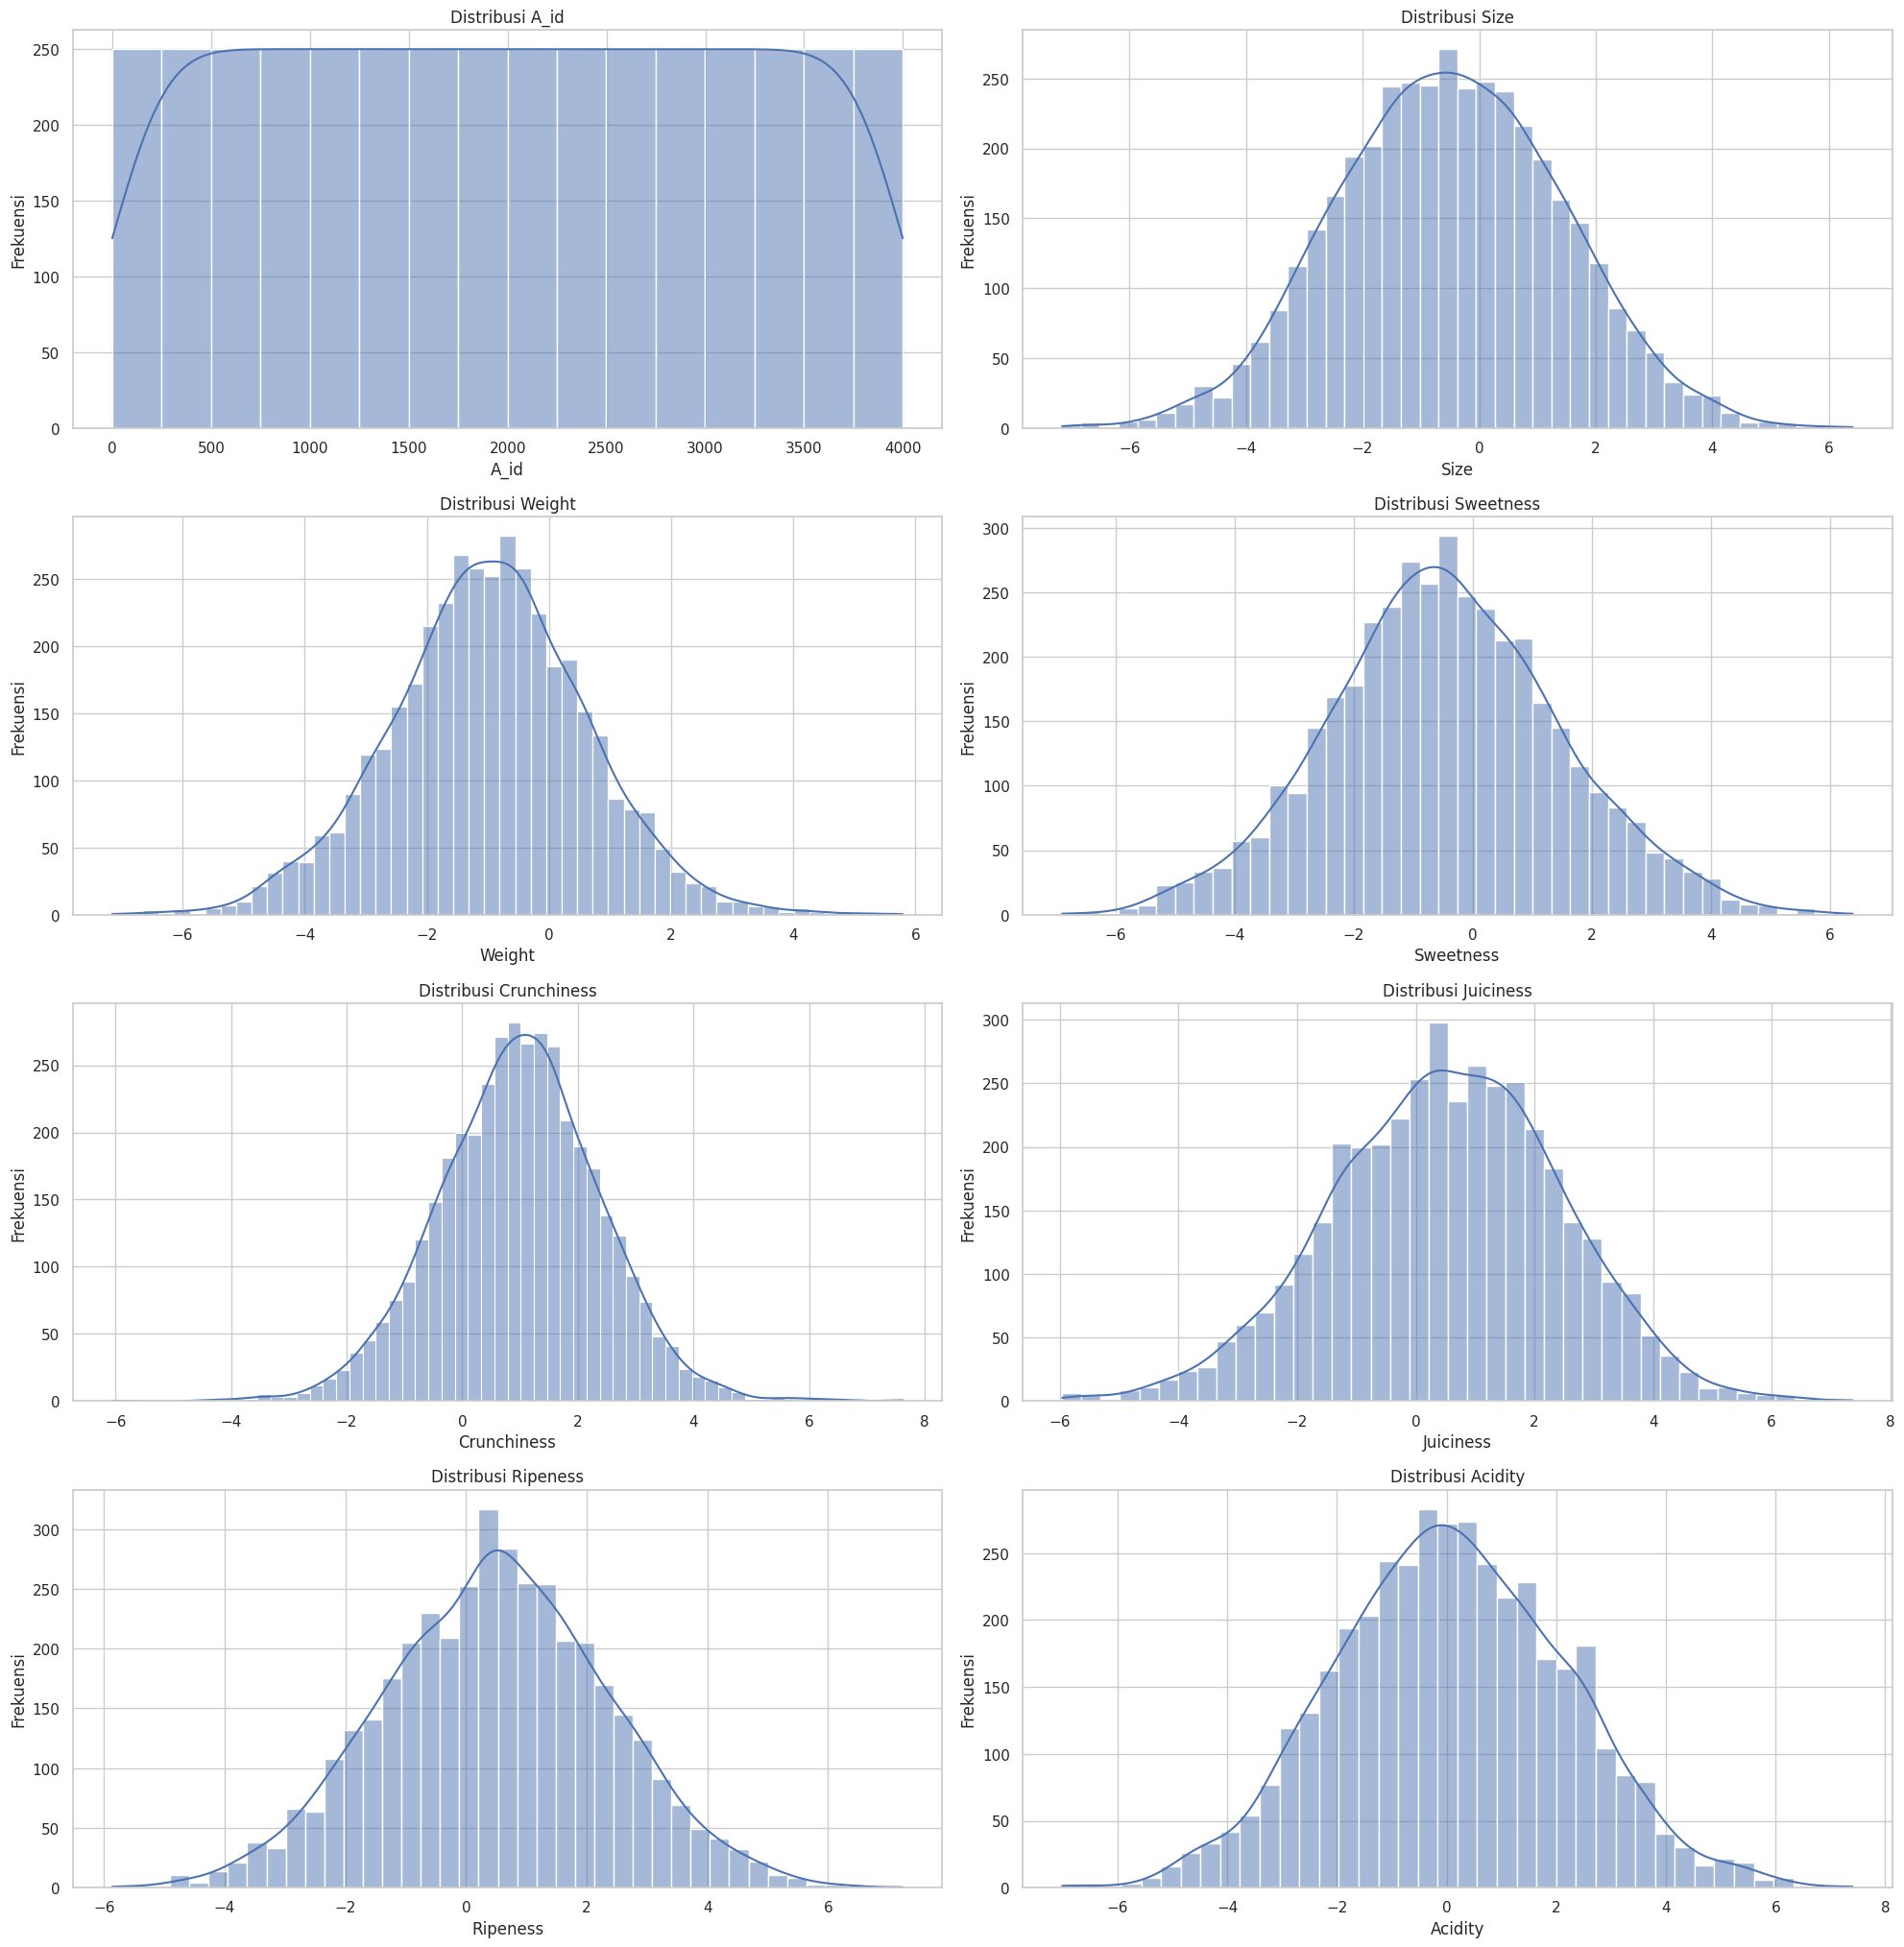

In [46]:
# Distribusi Fitur Numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 2  # plots per row

plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1) # Create subplot for each feature
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

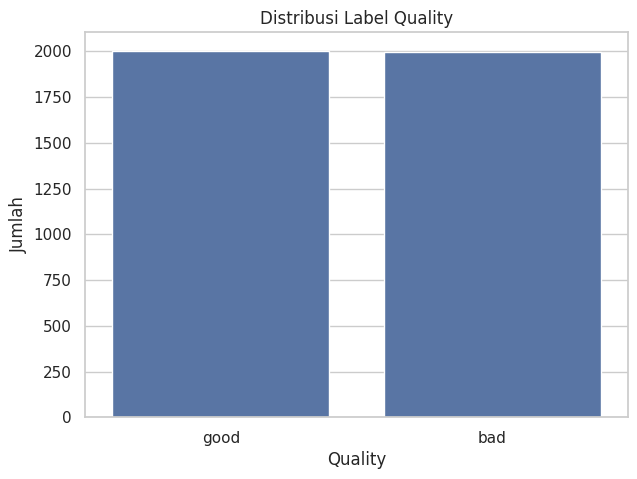

In [47]:
# Distribusi Target Kategorikal
plt.figure(figsize=(7,5))
sns.countplot(x='Quality', data=df)
plt.title("Distribusi Label Quality")
plt.xlabel("Quality")
plt.ylabel("Jumlah")
plt.show()

In [48]:
# Missing Value
print(df.isnull().sum())

# Jika ada missing value → imputasi median
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.median(numeric_only=True))
    print("Missing values telah diimputasi dengan median.")
else:
    print("Tidak ada missing values pada dataset.")

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64
Tidak ada missing values pada dataset.


In [49]:
# Outlier Handling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "quality"]  # kecuali target

def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        cleaned_data = cleaned_data[(cleaned_data[col] >= lower) &
                                    (cleaned_data[col] <= upper)]
    return cleaned_data

print("Jumlah data sebelum membersihkan outlier:", len(df))
df_clean = remove_outliers_iqr(df, numeric_cols)
print("Jumlah data setelah membersihkan outlier:", len(df_clean))

Jumlah data sebelum membersihkan outlier: 4000
Jumlah data setelah membersihkan outlier: 3786


In [50]:
# Encoding Label
df_clean['Quality'] = df_clean['Quality'].astype('category').cat.codes
print("Kolom 'Quality' telah dikonversi menjadi numeric.")

df_clean.head()

Kolom 'Quality' telah dikonversi menjadi numeric.


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0


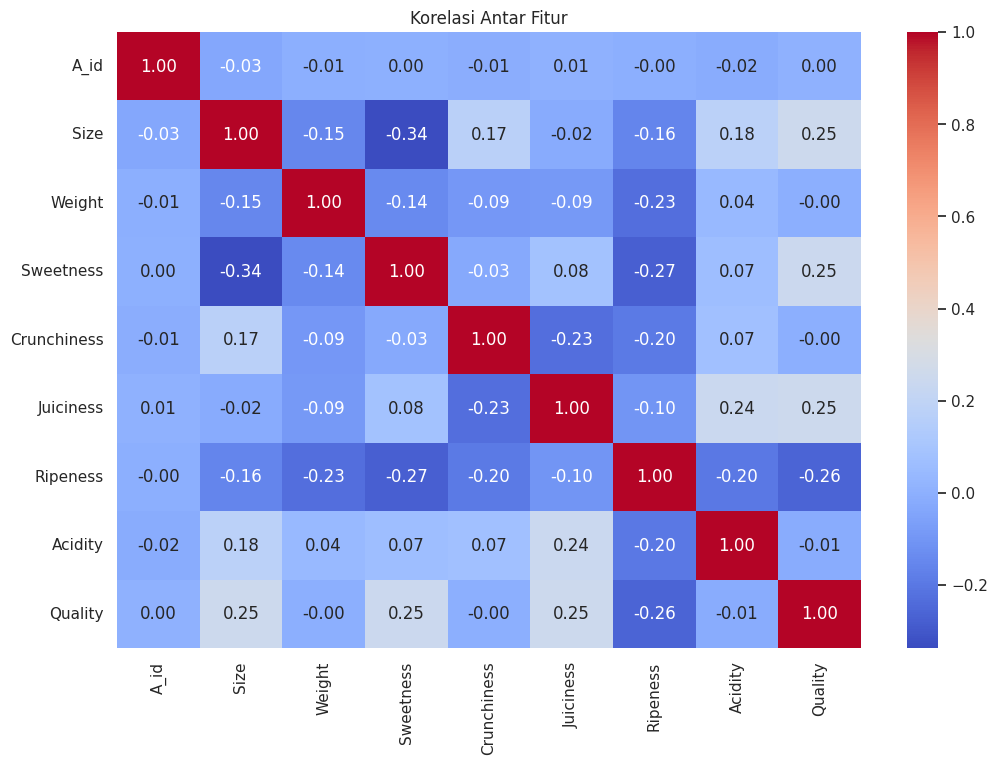

In [51]:
# Korelasi Antar Fitur
plt.figure(figsize=(12,8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

In [52]:
# Scalling FItur
scaler = StandardScaler()

scaled_df = df_clean.copy()
scaled_df[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("== Hasil Scaling (5 Data Teratas) ==")
display(scaled_df[numeric_cols].head())

== Hasil Scaling (5 Data Teratas) ==


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1,-1.728666,-0.370211,-1.237258,2.213532,0.464509,0.191007,0.189197,-0.382362
2,-1.727801,0.118011,-0.243366,-0.673125,-1.024030,1.264848,-0.313741,1.252215
3,-1.726936,-0.079383,-0.858110,0.963659,-0.835353,1.697194,-2.188577,0.357367
4,-1.726070,1.013295,-0.206849,0.050222,-1.186224,1.368826,-1.016759,0.216248
5,-1.725205,-1.575739,-0.281973,-0.766674,-1.188359,-2.354578,0.770735,-1.486294


## **TRAINING DAN EVALUASI MODEL**

In [53]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [54]:
# Split Fitur dan Target
X = scaled_df.drop("Quality", axis=1)
y = scaled_df["Quality"]

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (3786, 8)
Ukuran y: (3786,)


In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Array Dictionary
model_results = {}

In [57]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, pred_logreg))

model_results["Logistic Regression"] = accuracy_score(y_test, pred_logreg)


=== Logistic Regression ===
Accuracy: 0.7480211081794196

Confusion Matrix:
 [[302 100]
 [ 91 265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       402
           1       0.73      0.74      0.74       356

    accuracy                           0.75       758
   macro avg       0.75      0.75      0.75       758
weighted avg       0.75      0.75      0.75       758



In [58]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_rf))
print("\nClassification Report:\n", classification_report(y_test, pred_rf))

model_results["Random Forest"] = accuracy_score(y_test, pred_rf)


=== Random Forest ===
Accuracy: 0.8839050131926122

Confusion Matrix:
 [[361  41]
 [ 47 309]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       402
           1       0.88      0.87      0.88       356

    accuracy                           0.88       758
   macro avg       0.88      0.88      0.88       758
weighted avg       0.88      0.88      0.88       758



In [59]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print("\n=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("\nClassification Report:\n", classification_report(y_test, pred_knn))

model_results["KNN"] = accuracy_score(y_test, pred_knn)


=== K-Nearest Neighbors ===
Accuracy: 0.8759894459102903

Confusion Matrix:
 [[357  45]
 [ 49 307]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       402
           1       0.87      0.86      0.87       356

    accuracy                           0.88       758
   macro avg       0.88      0.88      0.88       758
weighted avg       0.88      0.88      0.88       758



In [60]:
# Standard Vector Machine
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

print("\n=== Standard Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_svm))
print("\nClassification Report:\n", classification_report(y_test, pred_svm))

model_results["SVM"] = accuracy_score(y_test, pred_svm)


=== Standard Vector Machine ===
Accuracy: 0.8891820580474934

Confusion Matrix:
 [[362  40]
 [ 44 312]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       402
           1       0.89      0.88      0.88       356

    accuracy                           0.89       758
   macro avg       0.89      0.89      0.89       758
weighted avg       0.89      0.89      0.89       758



In [61]:
# XGBoost Classifier
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, pred_xgb))

model_results["XGBoost"] = accuracy_score(y_test, pred_xgb)


=== XGBoost ===
Accuracy: 0.8944591029023746

Confusion Matrix:
 [[363  39]
 [ 41 315]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       402
           1       0.89      0.88      0.89       356

    accuracy                           0.89       758
   macro avg       0.89      0.89      0.89       758
weighted avg       0.89      0.89      0.89       758



In [62]:
# Hasil Performa Model
results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['Accuracy'])
display(results_df.sort_values(by="Accuracy", ascending=False))

,Accuracy
XGBoost,0.894459
SVM,0.889182
Random Forest,0.883905
KNN,0.875989
Logistic Regression,0.748021


## **HYPERPARAMETER & FEATURE ENGINEERING**

### **HYPERPARAMETER TUNING**

In [63]:
# Import Library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [64]:
# Split Fitur dan Target
X = scaled_df.drop("Quality", axis=1)
y = scaled_df["Quality"]

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (3786, 8)
Ukuran y: (3786,)


In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Fungsi Evaluasi Model
def evaluate_model(model, X_test, y_test):
    pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred)
    }

In [67]:
# Random Forest (Default)
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

rf_default_scores = evaluate_model(rf_default, X_test, y_test)

print("\n=== RANDOM FOREST (DEFAULT) ===")
print(rf_default_scores)


=== RANDOM FOREST (DEFAULT) ===
{'accuracy': 0.8839050131926122, 'precision': 0.8828571428571429, 'recall': 0.8679775280898876, 'f1': 0.8753541076487252}


In [68]:
# Random Forest (GridSearchCV)
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf_grid = grid_rf.best_estimator_

rf_grid_scores = evaluate_model(best_rf_grid, X_test, y_test)

print("\n=== RANDOM FOREST (GridSearchCV) ===")
print(rf_grid_scores)


=== RANDOM FOREST (GridSearchCV) ===
{'accuracy': 0.8891820580474934, 'precision': 0.8863636363636364, 'recall': 0.8764044943820225, 'f1': 0.8813559322033898}


In [69]:
# Random Forest (RandomizedSearchCV)
random_params_rf = {
    "n_estimators": np.arange(50, 300, 50),
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": np.arange(2, 15, 2),
    "min_samples_leaf": np.arange(1, 10, 2)
}

rand_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_params_rf,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

rand_rf.fit(X_train, y_train)
best_rf_rand = rand_rf.best_estimator_

rf_rand_scores = evaluate_model(best_rf_rand, X_test, y_test)

print("\n=== RANDOM FOREST (RandomizedSearchCV) ===")
print(rf_rand_scores)


=== RANDOM FOREST (RandomizedSearchCV) ===
{'accuracy': 0.8799472295514512, 'precision': 0.8862973760932945, 'recall': 0.8539325842696629, 'f1': 0.8698140200286123}


In [70]:
# XGBoost (Baseline)
xgb_base = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)
xgb_base.fit(X_train, y_train)
xgb_base_scores = evaluate_model(xgb_base, X_test, y_test)

print("\n=== XGBOOST BASELINE ===")
print(xgb_base_scores)


=== XGBOOST BASELINE ===
{'accuracy': 0.8944591029023746, 'precision': 0.8898305084745762, 'recall': 0.8848314606741573, 'f1': 0.8873239436619719}


In [71]:
# XGBoost (GridSearchCV)
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric="logloss", random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
best_xgb_grid = grid_xgb.best_estimator_

xgb_grid_scores = evaluate_model(best_xgb_grid, X_test, y_test)

print("\n=== XGBOOST (GridSearchCV) ===")
print(xgb_grid_scores)


=== XGBOOST (GridSearchCV) ===
{'accuracy': 0.8825857519788918, 'precision': 0.8803418803418803, 'recall': 0.8679775280898876, 'f1': 0.8741159830268741}


In [72]:
# XGBoost (RandomizedSearchCV)
random_params_xgb = {
    "n_estimators": np.arange(50, 300, 50),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": np.arange(3, 10),
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric="logloss", random_state=42),
    param_distributions=random_params_xgb,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

rand_xgb.fit(X_train, y_train)
best_xgb_rand = rand_xgb.best_estimator_

xgb_rand_scores = evaluate_model(best_xgb_rand, X_test, y_test)

print("\n=== XGBOOST (RandomizedSearchCV) ===")
print(xgb_rand_scores)


=== XGBOOST (RandomizedSearchCV) ===
{'accuracy': 0.8931398416886543, 'precision': 0.8851540616246498, 'recall': 0.8876404494382022, 'f1': 0.8863955119214586}


### **FEATURE ENGINEERING**

In [73]:
# Feature Importance
xgb_importances = best_xgb_grid.feature_importances_

fi_df_xgb = pd.DataFrame({
    "feature": X.columns,
    "importance": xgb_importances
}).sort_values(by="importance", ascending=False)

print("\n=== FEATURE IMPORTANCE (XGBoost - GridSearchCV) ===")
display(fi_df_xgb)


=== FEATURE IMPORTANCE (XGBoost - GridSearchCV) ===


,feature,importance
1,Size,0.179253
6,Ripeness,0.154047
5,Juiciness,0.149756
3,Sweetness,0.141638
7,Acidity,0.133003
2,Weight,0.105615
4,Crunchiness,0.093214
0,A_id,0.043474


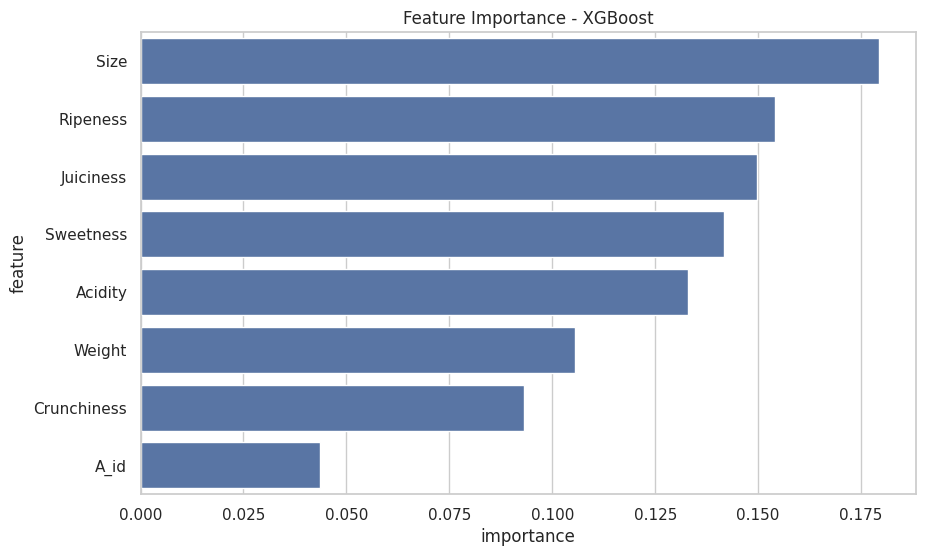

In [74]:
# Visual Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=fi_df_xgb)
plt.title("Feature Importance - XGBoost")
plt.show()

In [75]:
# Top 5 Features
top5_xgb = fi_df_xgb["feature"].head(5).tolist()
print("\nTop 5 Fitur XGBoost:", top5_xgb)


Top 5 Fitur XGBoost: ['Size', 'Ripeness', 'Juiciness', 'Sweetness', 'Acidity']


In [76]:
# Latih Ulang dengan top 5 fitur
X_train_top5 = X_train[top5_xgb]
X_test_top5 = X_test[top5_xgb]

xgb_top5 = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_top5.fit(X_train_top5, y_train)

xgb_top5_scores = evaluate_model(xgb_top5, X_test_top5, y_test)
print(xgb_top5_scores)

{'accuracy': 0.8324538258575198, 'precision': 0.8189415041782729, 'recall': 0.8258426966292135, 'f1': 0.8223776223776224}


In [77]:
# Hasil Perbandingan
result_df = pd.DataFrame({
    "Model": [
        "RF Default",
        "RF GridSearchCV",
        "RF RandomSearchCV",
        "XGB Baseline",
        "XGB GridSearchCV",
        "XGB RandomSearchCV",
        "XGB Top 5 Features",
    ],
    "Accuracy": [
        rf_default_scores["accuracy"],
        rf_grid_scores["accuracy"],
        rf_rand_scores["accuracy"],
        xgb_base_scores["accuracy"],
        xgb_grid_scores["accuracy"],
        xgb_rand_scores["accuracy"],
        xgb_top5_scores["accuracy"],
    ],
    "Precision": [
        rf_default_scores["precision"],
        rf_grid_scores["precision"],
        rf_rand_scores["precision"],
        xgb_base_scores["precision"],
        xgb_grid_scores["precision"],
        xgb_rand_scores["precision"],
        xgb_top5_scores["precision"],
    ],
    "Recall": [
        rf_default_scores["recall"],
        rf_grid_scores["recall"],
        rf_rand_scores["recall"],
        xgb_base_scores["recall"],
        xgb_grid_scores["recall"],
        xgb_rand_scores["recall"],
        xgb_top5_scores["recall"],
    ],
    "F1 Score": [
        rf_default_scores["f1"],
        rf_grid_scores["f1"],
        rf_rand_scores["f1"],
        xgb_base_scores["f1"],
        xgb_grid_scores["f1"],
        xgb_rand_scores["f1"],
        xgb_top5_scores["f1"],
    ]
})

print("\n=== PERBANDINGAN SEMUA MODEL ===")
display(result_df)


=== PERBANDINGAN SEMUA MODEL ===


,Model,Accuracy,Precision,Recall,F1 Score
0,RF Default,0.883905,0.882857,0.867978,0.875354
1,RF GridSearchCV,0.889182,0.886364,0.876404,0.881356
2,RF RandomSearchCV,0.879947,0.886297,0.853933,0.869814
3,XGB Baseline,0.894459,0.889831,0.884831,0.887324
4,XGB GridSearchCV,0.882586,0.880342,0.867978,0.874116
5,XGB RandomSearchCV,0.893140,0.885154,0.887640,0.886396
6,XGB Top 5 Features,0.832454,0.818942,0.825843,0.822378


In [78]:
# Latih Ulang Model Terbaik + Simpan File Joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Latih ulang XGBoost baseline dengan seluruh data training
xgb_final = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)
xgb_final.fit(X_train, y_train)

# Prediksi
pred_xgb_final = xgb_final.predict(X_test)

# Evaluasi
acc_xgb = accuracy_score(y_test, pred_xgb_final)
prec_xgb = precision_score(y_test, pred_xgb_final)
rec_xgb = recall_score(y_test, pred_xgb_final)
f1_xgb = f1_score(y_test, pred_xgb_final)

print("=== XGBoost Final Model (Baseline Terbaik) ===\n")
print("Accuracy :", acc_xgb)
print("Precision:", prec_xgb)
print("Recall   :", rec_xgb)
print("F1 Score :", f1_xgb)

# Simpan Model Ke Dalam FIle .joblib
joblib.dump(xgb_final, "xgb_apple_quality_model.joblib")
print("\nModel XGBoost berhasil disimpan sebagai: xgb_apple_quality_model.joblib")

=== XGBoost Final Model (Baseline Terbaik) ===

Accuracy : 0.8944591029023746
Precision: 0.8898305084745762
Recall   : 0.8848314606741573
F1 Score : 0.8873239436619719

Model XGBoost berhasil disimpan sebagai: xgb_apple_quality_model.joblib


## **EKSPLORASI TAMBAHAN**

In [79]:
df_clean.to_csv("apple_clean.csv", index=False)
scaled_df.to_csv("apple_processed.csv", index=False)